In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import datetime as dt
import seaborn as sns

missing_values = ["?"]
df = pd.read_csv('cereals.csv', na_values=missing_values)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
2,All-BranwithExtraFiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
3,AlmondDelight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
4,AppleCinnamonCheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,75.000000,75.000000,74.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.933333,7.040000,96.216216,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.762666,4.406506,67.594737,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,41.250000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,15.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


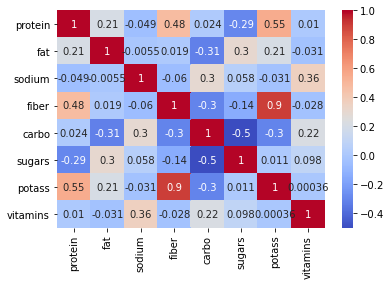

In [2]:
# Data visialization 

correlation = df[['protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']].corr()
sns.heatmap(correlation , annot = True, fmt='.2g',cmap= 'coolwarm') 

# 5 Number summary table 

df.describe()

In [3]:
# Data Cleaning 

# Replacing empty data with mean

df['protein'].fillna(value=df['protein'].mean(), inplace=True)
df['fat'].fillna(value=df['fat'].mean(), inplace=True)
df['sodium'].fillna(value=df['sodium'].mean(), inplace=True)
df['fiber'].fillna(value=df['fiber'].mean(), inplace=True)
df['carbo'].fillna(value=df['carbo'].mean(), inplace=True)
df['sugars'].fillna(value=df['sugars'].mean(), inplace=True)
df['potass'].fillna(value=df['potass'].mean(), inplace=True)
df['vitamins'].fillna(value=df['vitamins'].mean(), inplace=True)

df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.933333,7.040000,96.216216,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737498,4.377031,66.687384,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.966667,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [4]:
# Replacing noisy data with meadian

# Using IQR Method to filter outliers

def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

# Filling outlier values with NaN values 

# Protein 
upper, lower = outliers(df, "protein")
df.loc[df.protein < lower, 'protein'] = np.nan 
df.loc[df.protein > upper, 'protein'] = np.nan 

# Fat
upper, lower = outliers(df, 'fat')
df.loc[df.fat < lower, 'fat'] = np.nan 
df.loc[df.fat > upper, 'fat'] = np.nan

# Sodium
upper, lower = outliers(df, "sodium")
df.loc[df.sodium < lower, 'sodium'] = np.nan 
df.loc[df.sodium > upper, 'sodium'] = np.nan

# Fiber
upper, lower = outliers(df, 'fiber')
df.loc[df.fiber < lower, 'fiber'] = np.nan 
df.loc[df.fiber > upper, 'fiber'] = np.nan

# Carbohydrates
upper, lower = outliers(df, 'carbo')
df.loc[df.carbo < lower, 'carbo'] = np.nan 
df.loc[df.carbo > upper, 'carbo'] = np.nan

# Sugars
upper, lower = outliers(df, 'sugars')
df.loc[df.sugars < lower, 'sugars'] = np.nan 
df.loc[df.sugars > upper, 'sugars'] = np.nan

# potass
upper, lower = outliers(df, 'potass')
df.loc[df.potass < lower, 'potass'] = np.nan 
df.loc[df.potass > upper, 'potass'] = np.nan

# Vitamins
upper, lower = outliers(df, 'vitamins')
df.loc[df.vitamins < lower, 'vitamins'] = np.nan 
df.loc[df.vitamins > upper, 'vitamins'] = np.nan

# Filling nan values with median

df['protein'].fillna(value=df['protein'].median(), inplace=True)
df['fat'].fillna(value=df['fat'].median(), inplace=True)
df['sodium'].fillna(value=df['sodium'].median(), inplace=True)
df['fiber'].fillna(value=df['fiber'].median(), inplace=True)
df['carbo'].fillna(value=df['carbo'].median(), inplace=True)
df['sugars'].fillna(value=df['sugars'].median(), inplace=True)
df['potass'].fillna(value=df['potass'].median(), inplace=True)
df['vitamins'].fillna(value=df['vitamins'].median(), inplace=True)

df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.381579,1.013158,182.565789,1.785526,14.933333,7.040000,85.821479,25.0,2.197368,1.030000,0.827500,42.327057
std,19.139378,0.878895,1.013159,60.246679,1.520939,3.737498,4.377031,48.062504,0.0,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,25.0,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.0,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.000000,1.000000,190.000000,1.500000,14.966667,7.000000,90.000000,25.0,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.0,3.000000,1.000000,1.000000,50.780847
max,160.000000,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,25.0,3.000000,1.500000,1.500000,93.704912


In [5]:
# Question 6

pd.crosstab(index = df.type, columns= df.mfr)

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


In [6]:
# Question 7

max_rating = np.max(df.rating)
max_name = df.loc[df.rating == max_rating, 'name']
print('the cereal with the most rating of' , max_rating, 'is', max_name)
min_rating = np.min(df.rating)
min_name = df.loc[df.rating == min_rating, 'name']
print('the cereal with the least rating of' , min_rating, 'is', min_name)

the cereal with the most rating of 93.704912 is 2    All-BranwithExtraFiber
Name: name, dtype: object
the cereal with the least rating of 18.042851 is 9    CapnCrunch
Name: name, dtype: object


<AxesSubplot:title={'center':'rating'}, xlabel='[type]'>

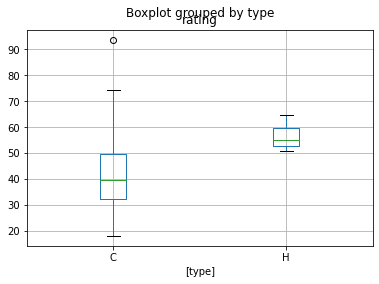

In [7]:
# Question 8 

df.boxplot(column =['rating'], by=['type'])

<AxesSubplot:>

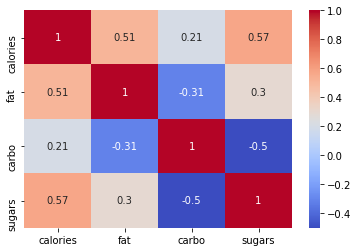

In [8]:
# Question 9 

correlation = df[['calories','fat','carbo','sugars']].corr()
sns.heatmap(correlation , annot = True, fmt='.2g',cmap= 'coolwarm') 

In [9]:
# Question 10

max_calories = np.max(df.calories)
max_name = df.loc[df.calories == max_calories, 'name']
print('the cereal with the most calories of' , max_calories, 'is', max_name)

the cereal with the most calories of 160 is 45    MueslixCrispyBlend
Name: name, dtype: object


Therefore as calories increases the consumer rating decreases


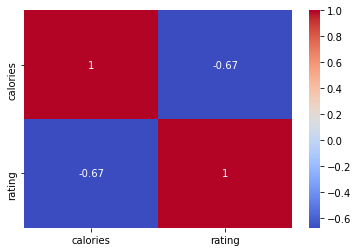

In [10]:
# Question 11

correlation = df[['calories','rating']].corr()
sns.heatmap(correlation , annot = True, fmt='.2g',cmap= 'coolwarm') 
print('Therefore as calories increases the consumer rating decreases')

Therefore calories and shelf are not too related


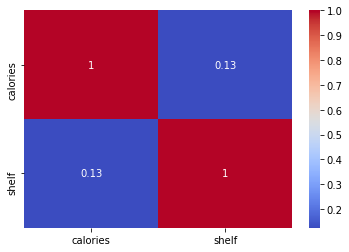

In [11]:
# Question 12

correlation = df[['calories','shelf']].corr()
sns.heatmap(correlation , annot = True, fmt='.2g',cmap= 'coolwarm') 
print('Therefore calories and shelf are not too related')

<AxesSubplot:xlabel='rating', ylabel='mfr'>

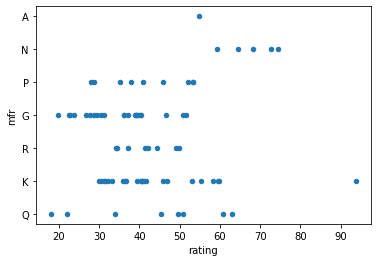

In [12]:
# Question 13

df.plot.scatter(x = 'rating', y = 'mfr')

protein, fiber and potassuium are ideal nutrients for a good cereal rating, the lack of fat and sugars is also essential for a good rating


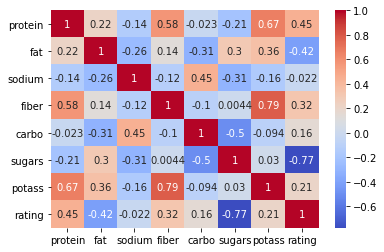

In [13]:
# Question 14 

correlation = df[['protein','fat','sodium','fiber','carbo','sugars','potass', 'rating']].corr()
sns.heatmap(correlation , annot = True, fmt='.2g',cmap= 'coolwarm') 

print('protein, fiber and potassuium are ideal nutrients for a good cereal rating, the lack of fat and sugars is also essential for a good rating')

In [14]:
# Question 15

# Importing sklearn packages 

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [15]:
# Taking relevent data for the regression model 

df_regression = df[['protein', 'fat', 'sugars', 'rating']]
df_regression.head()

,protein,fat,sugars,rating
0,3.0,5.0,8.0,33.983679
1,4.0,1.0,5.0,59.425505
2,4.0,0.0,0.0,93.704912
3,2.0,2.0,8.0,34.384843
4,2.0,2.0,10.0,29.509541


In [36]:
# Training the Data set 

X = df[['protein', 'fat', 'sugars']]
y = df[['rating']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

regression = LinearRegression()

regression.fit(X_train, y_train)

print(regression.score(X_test, y_test))

0.8933643383839325
